<a href="https://colab.research.google.com/github/Cristiancperez/Code_in_class/blob/main/04_%2C_DS_and_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Data Structure and Pandas**

`numpy` is for vector and matrices (`arrays`).

`pandas`is a library to work with databases (data with relations and conextions). In practical terms, `pandas` is the Excel of Python.

To make clear you can work with `numpy` and `pandas` at the same time.

In [ ]:
import pandas as pd
import numpy as np

# **2. Pandas series**

A series (in panda) is a one-dimensional object.

## 2.1 Series creation

In [ ]:
# Empty series

s_empty = pd.Series()
print(s_empty)

Series([], dtype: float64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Creating a Series - typing the values 
## int values

s_int = pd.Series([1,2,3,4,5,6,7])
print(s_int)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
dtype: int64


In [ ]:
# Creating a Series - using random numbers
## float values

s_num = pd.Series(np.random.rand(8))
print(s_num)

0    0.510361
1    0.132706
2    0.936071
3    0.604190
4    0.234089
5    0.578588
6    0.778110
7    0.233474
dtype: float64


# 4. Practical case


## 4.1 Similation

Asimulation is a *model* to replicate an event.

One of the key terms is **paths** of the simulation.

## 4.2. Creating the simulation

A simulation of the price of a financial asset.

To do this, we need:

* First, create the dates:

In [ ]:
# Daily dates from 2021 to update

## This line saves the current date with a given format
td = pd.to_datetime("today").strftime("%m/%d/%Y")

## Create the date range

dr = pd.date_range(start = "01/01/2021", end = td)

## Number of dates

nd =len(dr)

* Second, simulate the price (do not worry about the formula)

In [ ]:
# Price with returns ~ N(mu, sigma^2)

## Create the returns

mu = 0.001; sigma = 0.01
## np.random.seed(123) - fixe the simulation
r  = np.random.normal(mu, sigma, size = nd)

## Create the price

S1 = np.empty(nd)
S1[0] = 100       # initial price

for i in range(1,nd):
  S1[i] = S1[i-1]*np.exp(r[i])

* Convert S1 to a time-series object:

In [ ]:
# Convert S1

S1 = pd.Series(S1, index = dr)
S1.head(5)

2021-01-01    100.000000
2021-01-02    101.103388
2021-01-03    101.491335
2021-01-04    100.074057
2021-01-05     99.596246
Freq: D, dtype: float64

* One thing to do with data is to explore:

In [ ]:
#This a library to graphic
import matplotlib.pyplot as plt



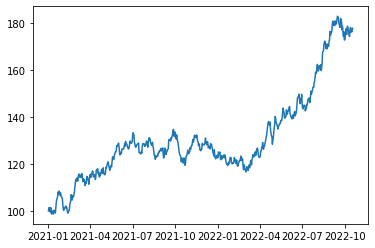

In [ ]:
plt.plot(S1)
plt.show()

So, we are going to use `plotly`

In [ ]:
# Import library

import plotly.express as px

In [ ]:
fig = px.line(S1, title = "Financial Asset")
fig.show()

* This graph is better, but we can **pimp it up:**

In [ ]:
fig = px.line(S1).update_layout(showlegend = False)

# Title
fig.update_layout(title = "Financial Asset",
                  title_font_size = 30,
                  title_x = 0.5)

# Axis
fig.update_xaxes(title = "Dates", title_font_size = 20)
fig.update_yaxes(title = "Price", title_font_size = 20)
fig.show()

In [ ]:
fig = px.line(S1).update_layout(showlegend = False)

# Title
fig.update_layout(title = "Financial Asset",
                  title_font_size = 30,
                  title_x = 0.5)

# Axis
fig.update_xaxes(title = "Dates", title_font_size = 20,
                 dtick = "M1",
                 tickformat = "%b\n%Y")
fig.update_yaxes(title = "Price", title_font_size = 20)
fig.show()

## 4.3. Basic Stadistics 



In [ ]:
# Very (very) basic info
print('Basic Stadistics:')
print('Obs: \t', S1.size)
print('Minimum:', round(S1.min(),2))
print('Mean:\t', round(S1.mean(),2))
print('Maximum:', round(S1.max(),2))



Basic Stadistics:
Obs: 	 656
Minimum: 95.42
Mean:	 123.33
Maximum: 147.19


### Add info to the graph

In [ ]:
fig = px.line(S1).update_layout(showlegend = False)

# Title
fig.update_layout(title = "Financial Asset",
                  title_font_size = 30,
                  title_x = 0.5)

# Axis
fig.update_xaxes(title = "Dates", title_font_size = 20,
                 dtick = "M1",
                 tickformat = "%b\n%Y")
fig.update_yaxes(title = "Price", title_font_size = 20)

# Text box
fig.add_annotation(x = '2021-02-01', y = 0.85*S1.max(),
                   text  = '<b> Basic Statistics: </b> <br>'
                            f'Obs: {S1.size}'
                   align = 'left',
                   showarrow = False,)

                   

fig.show()

SyntaxError: ignored

## 4.4 The power of Resampling 



In [ ]:
# Resampling daily to monthly - by mean
S1_m = S1.resample('M').mean()
print(S1_m)

2021-01-31    102.810983
2021-02-28    103.404225
2021-03-31    113.701990
2021-04-30    115.916912
2021-05-31    121.222448
2021-06-30    127.296522
2021-07-31    128.042842
2021-08-31    126.517698
2021-09-30    128.361500
2021-10-31    124.908706
2021-11-30    128.759813
2021-12-31    126.553980
2022-01-31    122.237509
2022-02-28    120.681742
2022-03-31    121.686381
2022-04-30    130.766740
2022-05-31    138.907612
2022-06-30    143.748909
2022-07-31    148.780840
2022-08-31    166.923645
2022-09-30    179.070413
2022-10-31    176.526191
Freq: M, dtype: float64


In fact, we can even more...

In [ ]:
# Resampling daily to monthly - by various
m_stats = S1.resample('M').agg(['count','min','mean','max'])
m_stats.head()

,count,min,mean,max
2021-01-31,31,98.699800,102.810983,108.482731
2021-02-28,28,99.031205,103.404225,112.077694
2021-03-31,31,110.811415,113.701990,115.857885
2021-04-30,30,113.383654,115.916912,118.350207
2021-05-31,31,115.367038,121.222448,128.413516


In [ ]:
fig2 = px.line(m_stats, title = 'Monthly Stats')
fig2.show()

# **DataFrames** 

dataset -> file

databes -> source

We are going to work with a real dataset.

## Importing a dataset

.xlsx, .csv, .txt.

Via request to a webpage 


**BE CAREFUL!** Remember we are in Google Colab hace the steps are for Google Colab.

### Getting a databased

In [ ]:
# Save the file path
p1 = '/content/dataset.xlsx'

# Read file
d_excel = pd.read_excel(p1)

# Check
d_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          12 non-null     datetime64[ns]
 1   Total         12 non-null     float64       
 2   Armenia       12 non-null     float64       
 3   Barranquilla  12 non-null     float64       
 4   Bogota        12 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 608.0 bytes
